# Ford GoBike System Data Exploration
## by Renju Mathew

## Preliminary Wrangling

In this document, we explore a dataset containing the duration times and related data for individual bike rides made in the San Francisco Bay bike-sharing system.

In [1]:
# import all packages and set plots to be embedded inline
from datetime import date
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
default_color = sb.color_palette()[0] # Set default colour for plots

In [2]:
# A convenient way of obtaining the days of the week
DAYS_OF_WEEK = [calendar.day_name[day] for day in np.arange(0, 7)]
WEEKDAYS = DAYS_OF_WEEK[0:5]
WEEKEND = DAYS_OF_WEEK[5:]

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# Display data shape & perform first visual inspection
print(df.shape)
display(df.head(5))
display(df.sample(5))

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
132481,227,2019-02-09 02:12:47.0940,2019-02-09 02:16:34.5950,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,267.0,Derby St at College Ave,37.861804,-122.253569,5183,Subscriber,1991.0,Male,No
176928,503,2019-02-02 09:42:05.5450,2019-02-02 09:50:29.1870,321.0,5th St at Folsom,37.780146,-122.403071,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2367,Subscriber,1992.0,Female,No
133332,848,2019-02-08 19:12:29.7890,2019-02-08 19:26:37.8240,90.0,Townsend St at 7th St,37.771058,-122.402717,127.0,Valencia St at 21st St,37.756708,-122.421025,3610,Subscriber,1992.0,Male,No
6124,1678,2019-02-28 10:44:52.1960,2019-02-28 11:12:50.4930,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,50.0,2nd St at Townsend St,37.780526,-122.390288,6497,Subscriber,1985.0,Male,No
42917,366,2019-02-22 17:10:09.9200,2019-02-22 17:16:16.7150,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,75.0,Market St at Franklin St,37.773793,-122.421239,5024,Subscriber,1985.0,Male,No


In [5]:
# Overview of data composition including data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# Some of these data types need to be fixed.
# Let's first remove null values present in: start_station_id & start_station_name and member_birth_year & member_gender. 
print( "The number of null values is:", df.isnull().any(axis=1).sum()) 

The number of null values is: 8460


In [7]:
df_original = df.copy() # Make a copy of the original, in case we need it later.

In [8]:
# Remove null values.         
df = df[~df['member_birth_year'].isnull()] # This also happens to take care of null values in member_gender.
df = df[~df['start_station_id'].isnull()] # This also happens to take care of null values in start_station_name.
print( "The number of null values is now:", df.isnull().any(axis=1).sum())

The number of null values is now: 0


In [9]:
df.shape

(174952, 16)

In [10]:
# Set to correct data types
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['start_station_id'] = df['start_station_id'].astype('int')
df['end_station_id'] = df['end_station_id'].astype('int')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [11]:
# Double check that the recorded duration ("duration_sec") is correct by calculating it ourselves
time_taken = df['end_time']-df['start_time']
time_taken = time_taken.dt.total_seconds().astype(int)
# Compare this with the recorded duration
[d for d in df['duration_sec']] == [d for d in time_taken]

True

In [12]:
# Generate descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [13]:
# Minimum birth year is 1878. This cannot be correct. Let's look at this:
df[df.member_birth_year == 1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No


In [14]:
# All the other entries were sensible so assume that this is a data entry error.
# Change 1878 to 1978.
df.loc[27370,'member_birth_year'] = 1978
# Check
df.loc[27370:27370]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1978,Female,No


In [15]:
# How many others are wrong?
counts = pd.DataFrame(df.member_birth_year.value_counts())
counts.rename(columns= {"member_birth_year":"count"})
display(counts.sort_index()[0:10])
print(len(df[(df['member_birth_year'].isin([1900,1901,1902,1910]))]))

,member_birth_year
1900,53
1901,6
1902,11
1910,1
1920,3
1927,1
1928,1
1930,1
1931,89
1933,20


71


In [16]:
# Birth years 1900 (age: 119) to 1910 (age: 109) seem impossible to unlikely.
# Remove these. (We could replace with the median, but there are only 71 rows so removing isn't a problem).
df = (df[~(df['member_birth_year'].isin([1900,1901,1902,1910]))])
# Check
counts = pd.DataFrame(df.member_birth_year.value_counts())
counts.rename(columns= {"member_birth_year":"count"}, inplace = True)
display(counts.sort_index()[0:3])

,count
1920,3
1927,1
1928,1


In [17]:
#Regenerate descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174881.000000,174881.000000,174881.000000,174881.000000,174881.000000,174881.000000,174881.000000,174881.000000,174881.000000
mean,704.026761,138.977819,37.771207,-122.351759,136.603999,37.771401,-122.351336,4482.560221,1984.837918
std,1642.511220,111.636810,0.100408,0.117746,111.334148,0.100312,0.117309,1659.207367,9.973986
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1920.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Shortest duration: 61 seconds  
Median duration:   510 seconds ($=$ 8.5 minutes)   
Longest duration:  84548 seconds ($\approx$ 23.5 hours)   

Earliest birth year: 1920  (Age: 99 yrs)    
Median birth year:   1987  (Age: 32 yrs)  
Latest birth year:   2001  (Age: 18 yrs)  

In [18]:
# How many unique bikes?
df.bike_id.nunique()

4607

In [19]:
# How many "Start stations"?
df.start_station_id.nunique()

329

In [20]:
# How many "End stations"? (We expect this to be the same as the above.)
print(df.end_station_id.nunique())

329


In [21]:
# So let's double check that all start stations can also be end stations:
set(df.start_station_id) == set(df.end_station_id)

True

In [22]:
df = df.reset_index(drop = True)

In [23]:
df.sample(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
162955,721,2019-02-04 07:37:29.348,2019-02-04 07:49:31.102,19,Post St at Kearny St,37.788975,-122.403452,88,11th St at Bryant St,37.77003,-122.411726,4998,Subscriber,1956,Female,Yes


In [24]:
# I'd prefer to see gender in Male, Female, Other order, so...
ordinal_var_dict = {'member_gender': ['Male', 'Female', 'Other']}
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict['member_gender'])
df['member_gender'] = df['member_gender'].astype(ordered_var)

In [25]:
# To finish data cleaning, we want to save in the tidiest format.
# This means separating into three tables, for the ride details, station details and user details respectively.
# The index will be the common ID.

df_ride = df[['duration_sec','start_time','end_time','bike_share_for_all_trip','bike_id']]
df_station = df[['start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude']]
df_user = df[['user_type','member_birth_year','member_gender']]

# Save in python's native pickle format to preserve datatypes
df_ride.to_pickle('df_ride.pkl') 
df_station.to_pickle('df_station.pkl')
df_user.to_pickle('df_user.pkl')

# For the purposes of analysis and visualisation we find it convenient to continue working with a single data frame.

In [26]:
total_rides = df.shape[0]
total_rides

174881

In [27]:
183412 - 174881

8531

### What is the structure of your dataset?

After cleaning, there are data for 174,881 individual bike rides in the dataset, all made in February, 2019. 
There are columns associated with the ride itself (start & end times; bike_id), the start & end stations (given as station id; name; latitude & location) and with the user (type of user; birth year; gender).

There are 329 stations and 4607 bikes.

### What is/are the main feature(s) of interest in your dataset?

We are interested in determining when the most rides are made (in terms of day of the week and the time of day) and what variables are correlated with the ride duration time. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the start and end stations will be important, as will the age of the user.

In [28]:
# As we will be looking at the day of the week, it is worthwhile making a separate column to store that variable.
df['start_day'] = [calendar.day_name[start.weekday()] for start in df.start_time]
df['end_day'] = [calendar.day_name[end.weekday()] for end in df.end_time]

# convert start_day & end_day into ordered categorical types
ordinal_var_dict = {'start_day': [calendar.day_name[day] for day in np.arange(0, 7)],
                    'end_day': [calendar.day_name[day] for day in np.arange(0, 7)],}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [29]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day
112021,278,2019-02-11 22:04:37.220,2019-02-11 22:09:16.144,256,Hearst Ave at Euclid Ave,37.875112,-122.260553,255,Virginia St at Shattuck Ave,37.876573,-122.269528,5106,Subscriber,1985,Male,No,Monday,Monday


## Univariate Exploration

Let us start by looking a little closer at some of the categorical variables to get a better understanding of the overall data.

Male      74.589578
Female    23.325576
Other      2.084846
Name: member_gender, dtype: float64


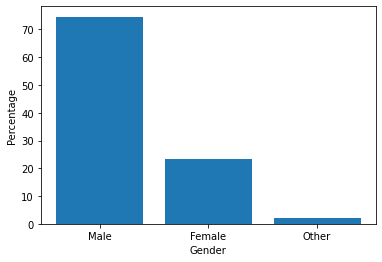

In [30]:
plt.bar(df.member_gender.value_counts().index, height = 100*df.member_gender.value_counts()/total_rides);
print(100*df.member_gender.value_counts()/total_rides)
plt.xlabel('Gender')
plt.ylabel('Percentage');

Subscriber    90.52956
Customer       9.47044
Name: user_type, dtype: float64


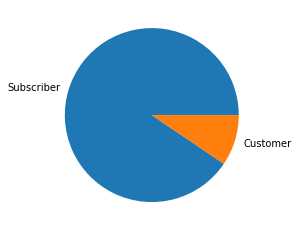

In [31]:
print(100*df.user_type.value_counts()/total_rides)
plt.pie(df.user_type.value_counts(), labels = ["Subscriber", "Customer"]);

In [32]:
# Generally we want to avoid pie charts, but here there are only two possibilities
# We use it make the simple point that most of the rides are made by subscribers.

In [33]:
# When are most of the rides taken? Start with plotting the number of rides on each date.

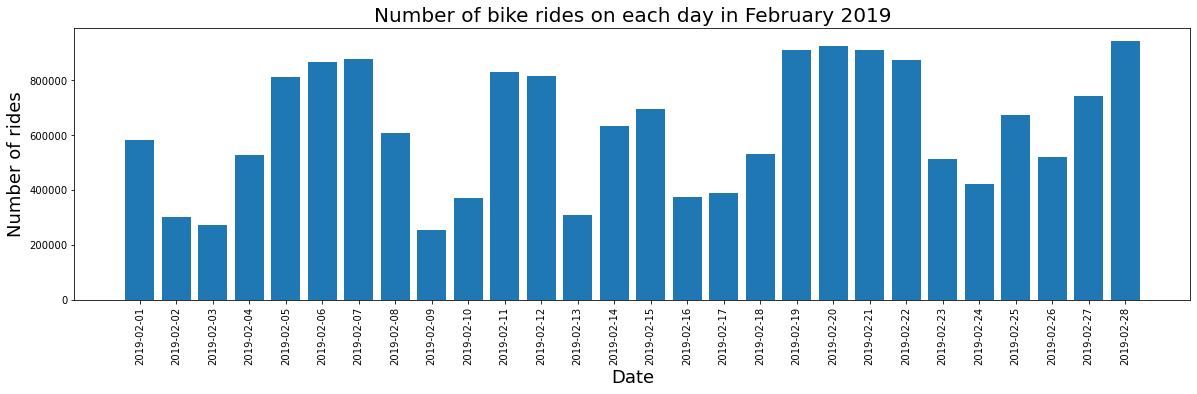

In [34]:
to_plot = pd.Series([start.date() for start in df.start_time])
plt.figure(figsize = (20,5))
plt.bar(to_plot.value_counts().index, height = 100*to_plot.value_counts()); #/total_rides
plt.xticks(to_plot.value_counts().index, rotation = 90);
plt.title('Number of bike rides on each day in February 2019', fontsize = 20)
plt.ylabel('Number of rides', fontsize = 18);
plt.xlabel('Date', fontsize = 18);
plt.show()

In [35]:
# Clearly on some days there are fewer rides than others.
# The graph looks periodic (with ~5 "up" days followed by ~2 "down" days).
# Could this be a weekend effect?

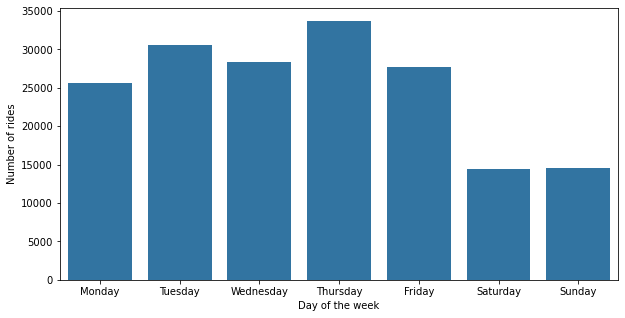

In [36]:
# Let's plot the counts for each day of the week.
plt.figure(figsize = (10,5))
sb.countplot(data = df, x = 'start_day', color = default_color, order= [calendar.day_name[day] for day in np.arange(0, 7)]);
plt.ylabel('Number of rides');
plt.xlabel('Day of the week');

In [37]:
# Great! That shows clearly that there is a drop on the weekends (perhaps due to the absence of commuters?)

Thursday     19.273106
Tuesday      17.479886
Wednesday    16.248192
Friday       15.808464
Monday       14.656252
Sunday        8.293640
Saturday      8.240461
Name: start_day, dtype: float64


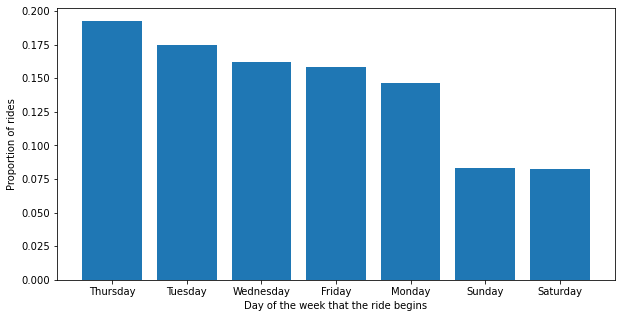

In [38]:
# Let's reorder these based on **proportion**.
plt.figure(figsize = (10,5))
plt.bar(df.start_day.value_counts().index, height = df.start_day.value_counts()/total_rides);
print(100*df.start_day.value_counts()/total_rides)
plt.ylabel('Proportion of rides');
plt.xlabel('Day of the week that the ride begins');

In [39]:
# ~1/5 of the rides are made on Thursday and ~1/5 at the weekend (Sat & Sun together).

In [40]:
# Let us now look at the distribution of the main variable of interest: duration of each ride.

In [41]:
MAX_DURATION = df['duration_sec'].max()
MIN_DURATION = df['duration_sec'].min()
display(df['duration_sec'].describe())

count    174881.000000
mean        704.026761
std        1642.511220
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

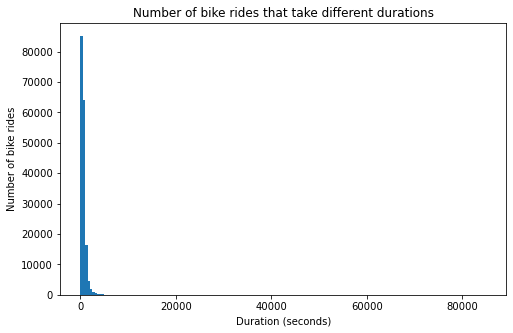

In [42]:
# Start with a standard-scaled plot
binsize = 500; bins = np.arange(0, MAX_DURATION+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of bike rides')
plt.title('Number of bike rides that take different durations')
plt.show()

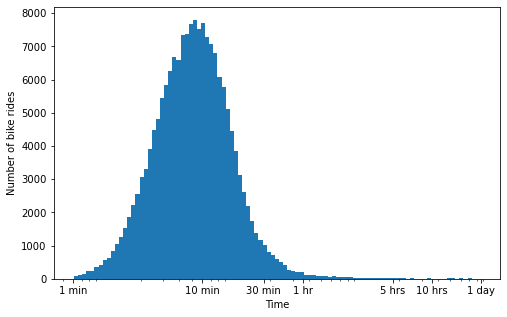

In [43]:
# Use a log scale because of the long tail in the distribution
bins2 = np.logspace( np.log10(MIN_DURATION),  np.log10(MAX_DURATION), num=100)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins2)
plt.xscale('log')
plt.xticks([60, 600, 1800, 3600, 18000, 36000, 86400], ['1 min', '10 min', '30 min', '1 hr', '5 hrs', '10 hrs', '1 day'])
plt.xlabel('Time')
plt.ylabel('Number of bike rides')
plt.show()

In [44]:
# The median duration is roughly 10 minutes (50th percentile is 510 seconds = 8.5 minutes)
# Looks normally distributed except that there is a long tail; so, right skewed.
# No trip took longer than 1 day (Longest trip was 84548 seconds ≈  23.5 hours)

In [45]:
# When are most of the rides taken? Plot the number of rides within each hour bracket.

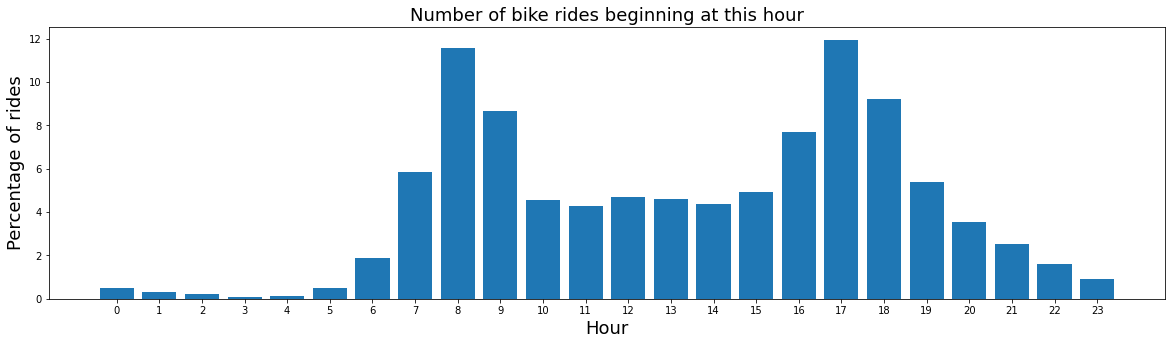

In [46]:
to_plot = pd.Series([start.time().hour for start in df.start_time])
plt.figure(figsize = (20,5))
plt.bar(to_plot.value_counts().index, height = 100*to_plot.value_counts()/total_rides); #/total_rides
plt.xticks(to_plot.value_counts().index);
plt.title('Number of bike rides beginning at this hour', fontsize = 18)
plt.xlabel('Hour', fontsize = 18); plt.ylabel('Percentage of rides', fontsize = 18);

In [47]:
# Note that in the above plot "0" means between "00:00 and 01:00", "1" means between "01:00 and 02:00" etc.
# There is a clear bimodal distribution supporting our hypothesis of heavy commuter usage
# In other words, there is a higher usage during the hours of 7-10 and 4-7 which are the beginning and end of the working day.

In [48]:
# Let's have a look at the 30 minute resolutions
dfcopy = df.copy()
dfcopy.set_index('start_time', inplace=True) 
df_resample = dfcopy.resample('30min').count()
df_resample.reset_index(inplace = True)
df_resample['start_time'] = [ val.time() for val in df_resample['start_time'] ]
#df_resample.head()

In [49]:
to_plot = pd.DataFrame(df_resample.groupby('start_time').sum()['start_station_id'])
to_plot.rename(columns = {'start_station_id' : 'number_of_trips'}, inplace = True)
to_plot.reset_index(inplace = True)
total_trips = to_plot.number_of_trips.sum()
print(total_trips) # Sanity check; this number is what we expected.

174881


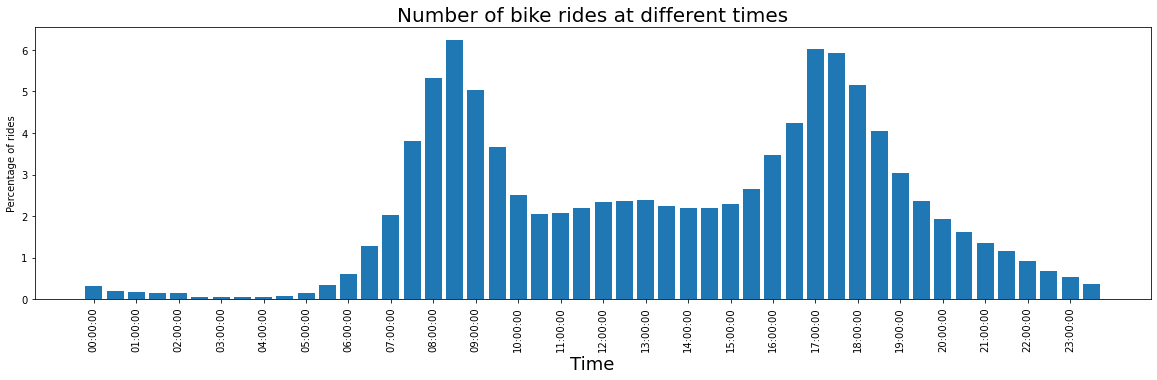

In [50]:
plt.figure(figsize = (20,5))
plt.bar(to_plot.index, 100*to_plot.number_of_trips/total_trips)
plt.xticks(to_plot.index[::2], to_plot.start_time[::2], rotation = 90);
plt.title('Number of bike rides at different times', fontsize = 20)
plt.ylabel('Percentage of rides');
plt.xlabel('Time', fontsize = 18);

174881


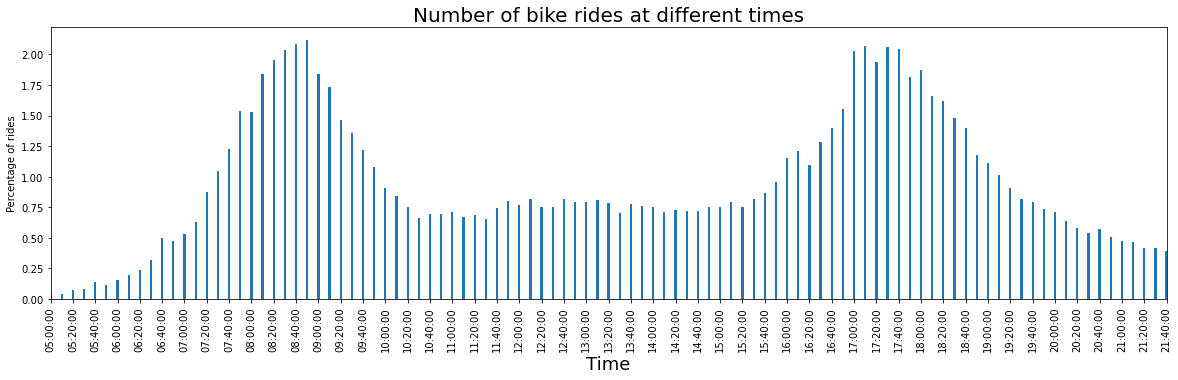

In [51]:
# Let's have a look at the 10 minute resolutions
df_resample = dfcopy.resample('10min').count()
df_resample.reset_index(inplace = True)
df_resample['start_time'] = [ val.time() for val in df_resample['start_time'] ]
to_plot = pd.DataFrame(df_resample.groupby('start_time').sum()['start_station_id'])
to_plot.rename(columns = {'start_station_id' : 'number_of_trips'}, inplace = True)
to_plot.reset_index(inplace = True)
total_trips = to_plot.number_of_trips.sum(); print(total_trips) # Sanity check; this number is what we expected.
plt.figure(figsize = (20,5))
plt.bar(to_plot.index, 100*to_plot.number_of_trips/total_trips, width = 0.2)
skip = 2
plt.xticks(to_plot.index[::skip], to_plot.start_time[::skip], rotation = 90);
plt.xlim(30,130)
plt.title('Number of bike rides at different times', fontsize = 20)
plt.ylabel('Percentage of rides');
plt.xlabel('Time', fontsize = 18);

In [52]:
# The bimodal distribution reveals that
# there is a higher usage between 07:40 & 08:30 and 16:30-18:50 
# which are the beginning and end of the working day

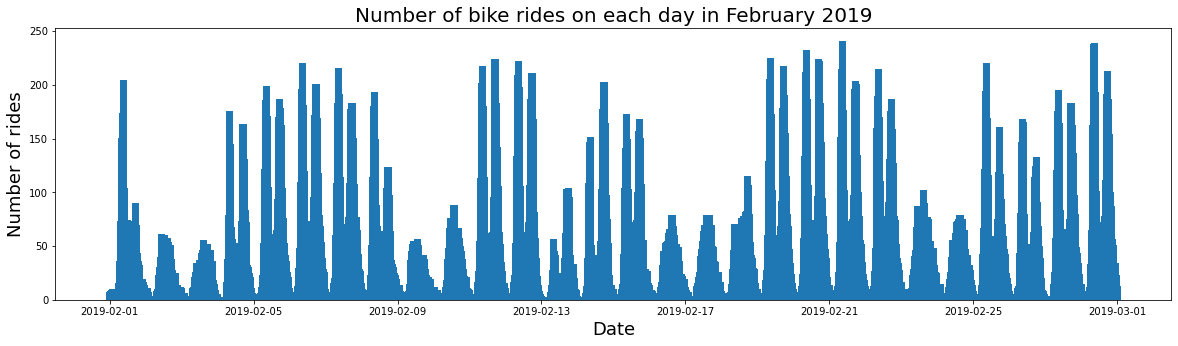

In [53]:
# Can we also see this bimodal distribution across the whole of the month? 
dfcopy = df.copy()
dfcopy.set_index('start_time', inplace=True) 
df_resample = dfcopy.resample('10min').count()
df_resample.reset_index(inplace = True)
df_resample2 = df_resample[['start_time', 'start_day']]
df_resample2

plt.figure(figsize = (20,5))
plt.bar(df_resample2.start_time, height = df_resample2.start_day, width = 0.2); #/total_rides
#plt.xticks(to_plot.value_counts().index, rotation = 90);
plt.title('Number of bike rides on each day in February 2019', fontsize = 20)
plt.ylabel('Number of rides', fontsize = 18);
plt.xlabel('Date', fontsize = 18);
#plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.show()

In [54]:
# Yes we can. Interestingly, we can also see that the weekends do not have a bimodal distribution (in time), which supports 
# our hypothesis that the bimodality is due to commuting during the work week.

In [55]:
# Let's now have a look at the distribution of the year of birth.

In [56]:
df.member_birth_year.describe()['max']

2001.0

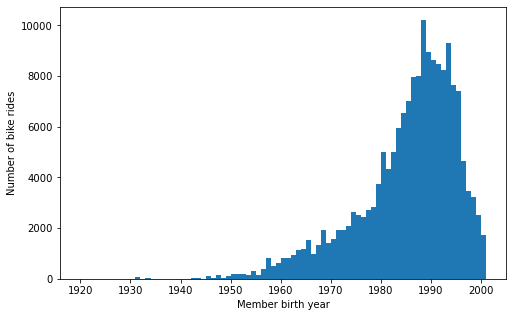

In [57]:
# Start with a standard-scaled plot
binsize = 1; bins = np.arange(df.member_birth_year.describe()['min'], df.member_birth_year.describe()['max']+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.xlabel('Member birth year')
plt.ylabel('Number of bike rides')
plt.show()

In [58]:
# Converting this to the age of the member seems sensible!
df['member_age'] = 2019 - df.member_birth_year 

In [59]:
df['member_age'].describe()

count    174881.000000
mean         34.162082
std           9.973986
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: member_age, dtype: float64

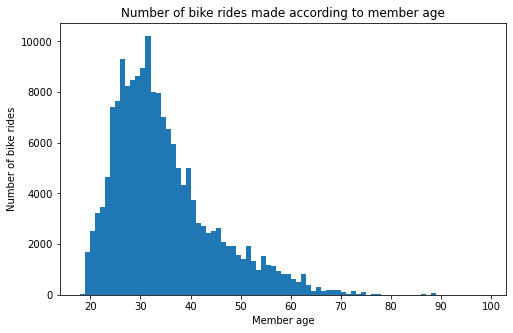

In [60]:
binsize = 1; bins = np.arange(df['member_age'].describe()['min'], df['member_age'].describe()['max']+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_age', bins = bins)
plt.xlabel('Member age')
plt.ylabel('Number of bike rides')
plt.title('Number of bike rides made according to member age')
plt.show()

In [61]:
# Right skewed distribution with a median age of 32.

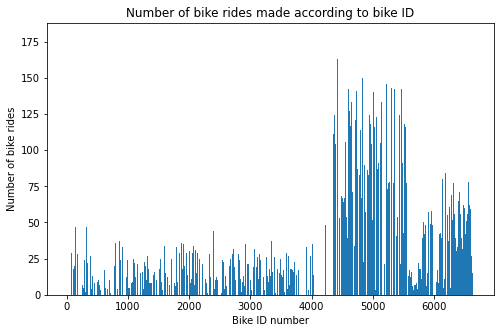

In [62]:
# Let's also have a look at whether some bikes are used more than others
binsize = 1; bins = np.arange(df['bike_id'].describe()['min'], df['bike_id'].describe()['max']+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'bike_id', bins = bins)
plt.xlabel('Bike ID number')
plt.ylabel('Number of bike rides')
plt.title('Number of bike rides made according to bike ID')
plt.show()

In [63]:
# Certainly, some bikes are used much more than others. 
# Are some stations also used more than others?

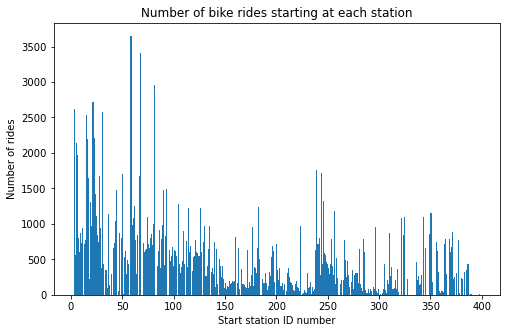

In [64]:
binsize = 1; bins = np.arange(df['start_station_id'].describe()['min'], df['start_station_id'].describe()['max']+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'start_station_id', bins = bins)
plt.xlabel('Start station ID number')
plt.ylabel('Number of rides')
plt.title('Number of bike rides starting at each station')
plt.show()

In [65]:
# Again, it is clear that some stations are frequented much more than others.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The members were 75% male, 23% female and 2% other.
91% were subscribers; 9% were customers.
On a Saturday (or Sunday) there were >50% fewer rides made as on a Thursday: Thursday (19%), Saturday (8%), Sunday (8%).

Implausible ages were treated as unreliable outliers and removed, giving a median age of 34.

The time duration of each ride took on a large range of values, so I looked at the data under a log transformation.
The median duration is roughly 10 minutes. Most trips were between a few minutes to under an hour. No trip took longer than a day.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I found a bimodal distribution when looking at what time of the day bike rides were made, with the most rides being taken during commuting hours.

To precisely determine the relevant time periods, I resampled the time series of the data to look at 30-minute resolutions and 10-minute resolutions. I found the highest usages between 7:40 a.m.⁠ – ⁠08:30 a.m. and 4:30 p.m.⁠ – ⁠06:50 p.m.

Birth years were converted to ages as the latter are more intuitive to humans.

## Bivariate Exploration

To keep things neatly organised, there will be extra headings throughout the rest of the notebook.

Thursday     19.270247
Tuesday      17.483889
Wednesday    16.243045
Friday       15.803890
Monday       14.656252
Sunday        8.297642
Saturday      8.245035
Name: end_day, dtype: float64


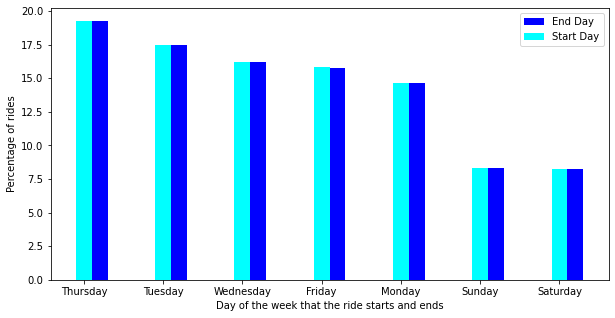

In [66]:
# Let us do a quick sanity check. We know that most rides are less than 10 minutes.
# This means that if we look at distribution of the days on which a ride ENDED,
# it should be almost exactly the same as the distribution of the days on which a ride BEGAN
plt.figure(figsize = (10,5))
plt.bar(df.end_day.value_counts().index, height = 100*df.end_day.value_counts()/total_rides, width = 0.3, align = 'edge', label = 'End Day', color = 'blue');
plt.bar(df.start_day.value_counts().index, height = 100*df.start_day.value_counts()/total_rides, width = 0.2, label = 'Start Day', color = 'cyan');
plt.legend()
print(100*df.end_day.value_counts()/total_rides)
plt.ylabel('Percentage of rides');
plt.xlabel('Day of the week that the ride starts and ends');

In [67]:
# That's fine. The end day is no longer interesting. Let's exclude this from further analyses.
df_new = df[[column for column in df.columns if column not in ["end_day"]]] 

In [68]:
numeric_vars = ['duration_sec', 'member_birth_year', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'start_station_id', 'bike_id'] 
categoric_vars = ['member_gender', 'start_day', 'user_type', 'bike_share_for_all_trip']

### Numeric variables

In [69]:
# Now let's try to get an overview by looking at the pairwise correlations between all the *numeric* variables.

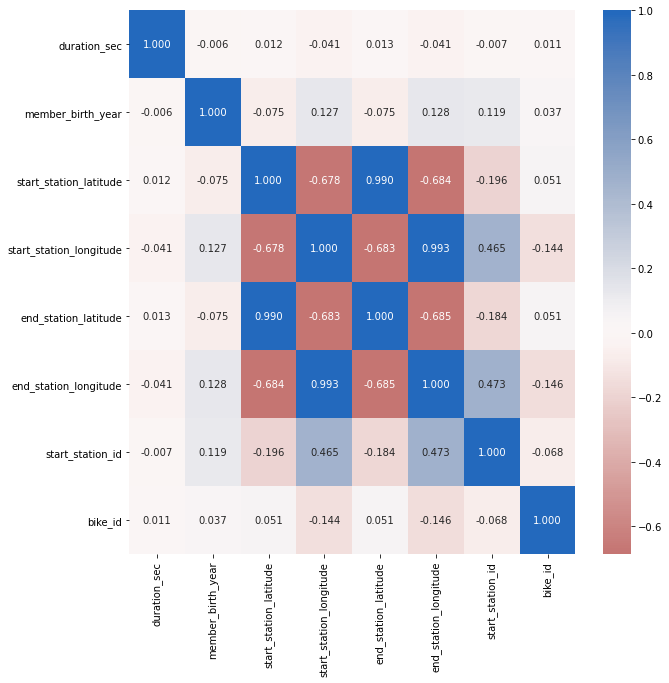

In [70]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(df_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [71]:
# I'm not sure I've learned anything from this, other than that station latitude and longitude are inversely correlated.

In [72]:
# plot matrix: sample 500 rides so that plots are clearer and so that they render faster
samples = np.random.choice(df_new.shape[0], 500, replace = False)
df_samp = df_new.loc[samples,:]

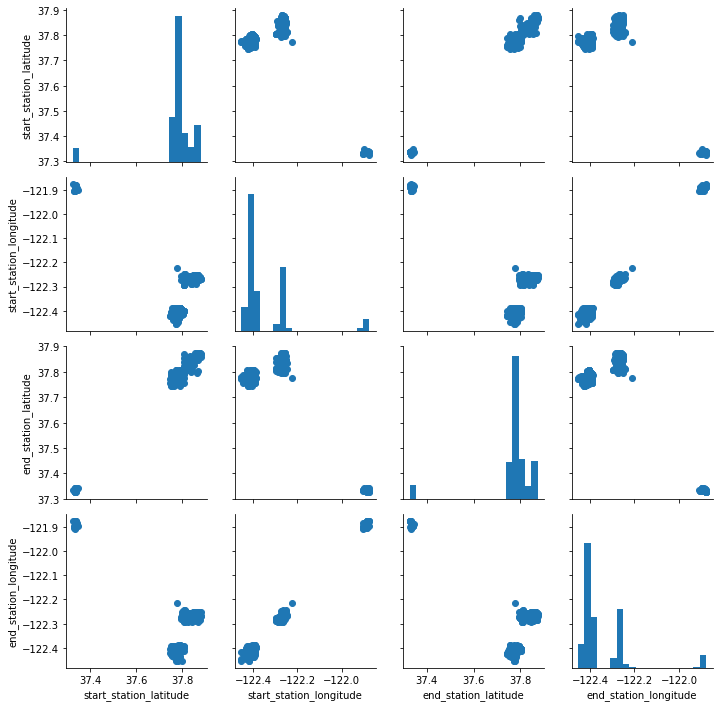

In [73]:
numeric_vars = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'] 
g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

In [74]:
# This shows that the stations are clustered at certain locations in the San Francisco area.
# Latitude and longitude clearly are inversely correlated (because they lie on the off-diagonal).

In [75]:
# Let's look at this more closely, with more points.

In [76]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    '''Convenience function for the next plot'''    
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    bins = 500
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

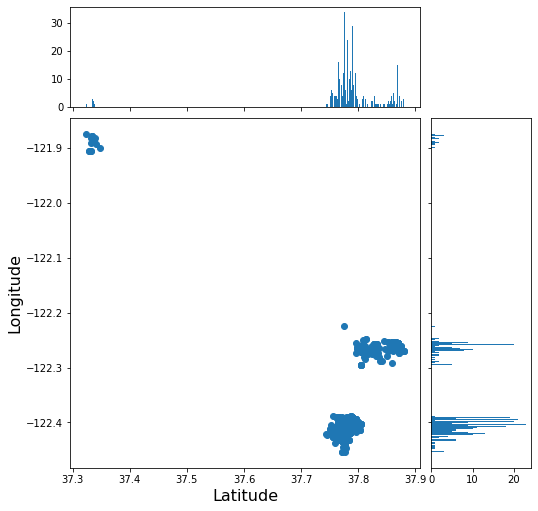

In [77]:
# Modified template found here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
scale = 0.8
gs = fig.add_gridspec(2, 2,  width_ratios=(7*scale, 2*scale), height_ratios=(2*scale, 7*scale),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(df_samp.start_station_latitude, df_samp.start_station_longitude, ax, ax_histx, ax_histy)
ax.set_xlabel('Latitude', fontsize = 16)
ax.set_ylabel('Longitude', fontsize = 16)
plt.show()

In [78]:
# So we have stations at three clusters:
# The co-ordinates for these clusers are (by visual inspection):
# (37.32, -121.9); (37.77, -122.4); (37.85, -122.25)

In [79]:
# Now that we know that this, we can look at all the remaining numeric varibles
# And just use start_longitude & start_latitude (and ignore end_latitude & end_longitude)
numeric_vars = ['duration_sec', 'member_age', 'start_station_latitude', 'start_station_longitude', 'start_station_id', 'bike_id'] 
categoric_vars = ['member_gender', 'start_day', 'user_type', 'bike_share_for_all_trip']

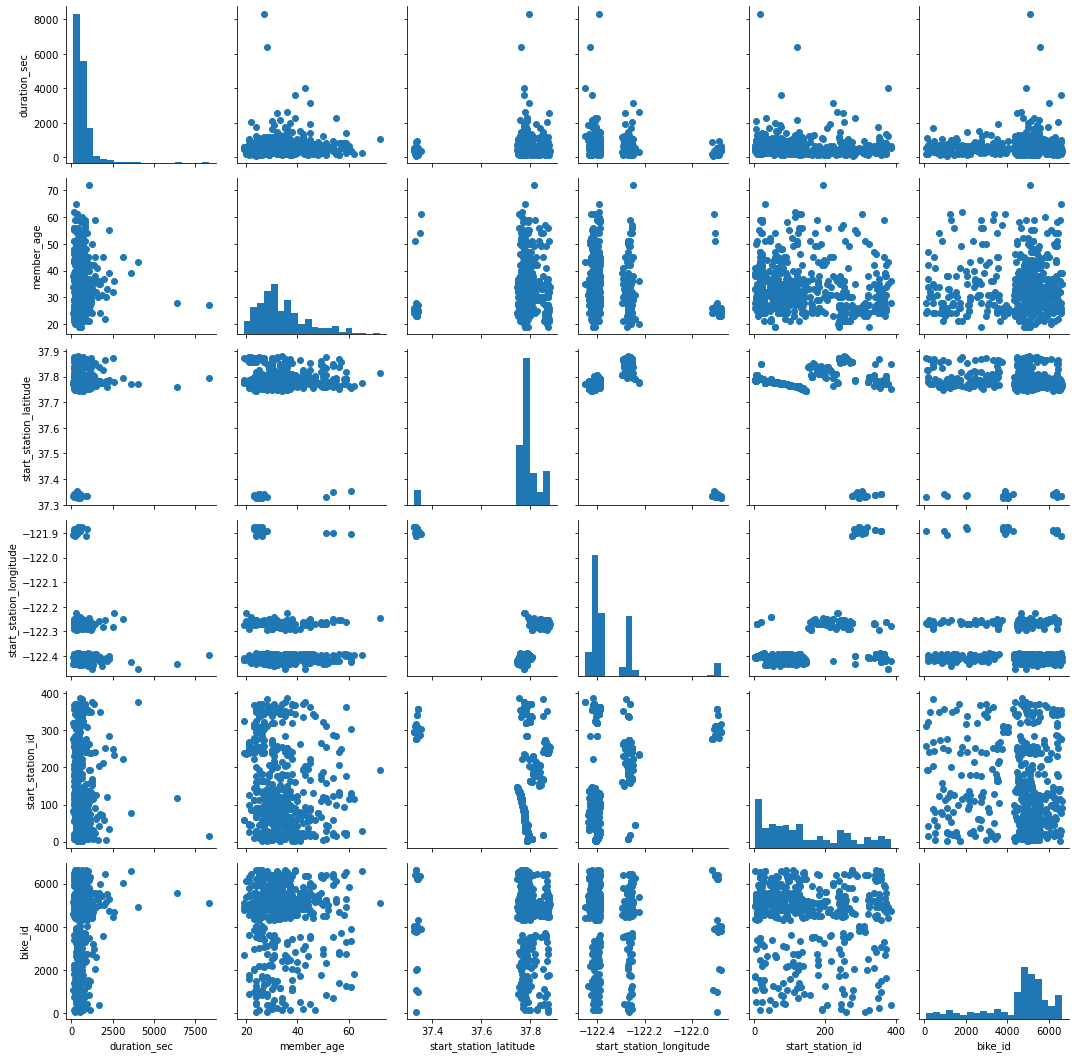

In [80]:
# plot matrix: sample 500 points so that plots are clearer and
# they render faster
samples = np.random.choice(df_new.shape[0], 500, replace = False)
df_samp = df_new.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

In [81]:
# I'm unconvinced that I've learned anything new here that is of interest.
# It doesn't look like any particular bike is associated with any particular station.

### Non-numeric variables

In [82]:
# Now the non-numeric variables.

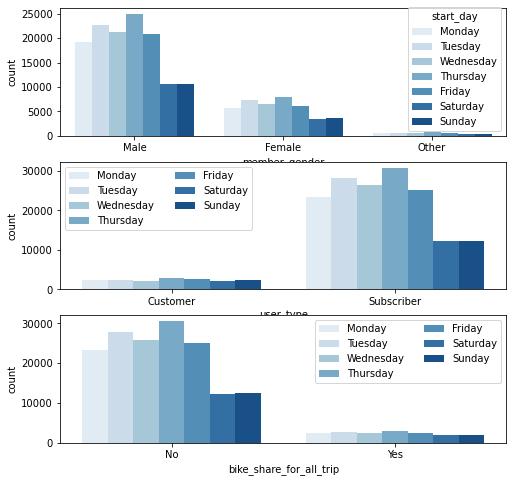

In [83]:
# since there are only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: member_gender vs start_day
plt.subplot(3, 1, 1)
sb.countplot(data = df_new, x = 'member_gender', hue = 'start_day', palette = 'Blues')

# subplot 2: user_type vs. start_day
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_new, x = 'user_type', hue = 'start_day', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: bike_share_for_all_trip vs. start_day
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_new, x = 'bike_share_for_all_trip', hue = 'start_day', palette = 'Blues')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

In [84]:
# I don't see anything interesting here. 
# The day counts are all approximately the same proportion
# regardless of whether we split by gender, user type or bike share type.

# It is difficult to make sense of these because the groups compared have such different proportions.
# So let's look at ratios...

In [85]:
# Let us go systematically through each pair of possibly related variables to try to discover useful relationships.

### Subscriber:customer ratio through the week

[10.1004764  12.49029126 12.46682464 10.75209205  9.88853879  5.63795486
  5.30882993]


Text(0.5, 1.0, 'Subscriber:customer ratio on each day of the week')

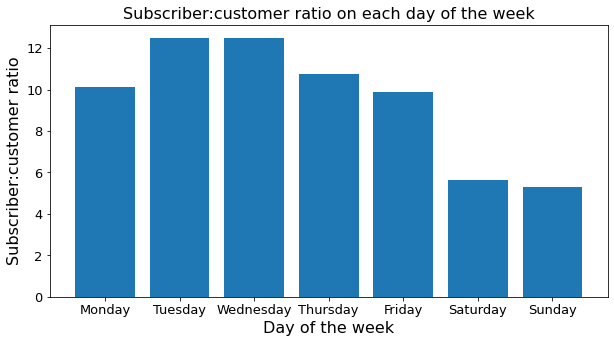

In [86]:
# Look at the ratio of the number of subscribers to the number of customers for all the days of the week.
startday_usertype = pd.DataFrame(df_new.groupby(['start_day', 'user_type']).size())
startday_usertype = startday_usertype.rename(columns = {0 : "count"})
startday_usertype = startday_usertype.reset_index()
customer_count = startday_usertype.loc[startday_usertype.user_type=='Customer']['count'].values
subscriber_count = startday_usertype.loc[startday_usertype.user_type=='Subscriber']['count'].values
ratios = (subscriber_count/customer_count)
print(ratios)
plt.figure(figsize = (10,5))
plt.bar(DAYS_OF_WEEK, height = ratios)
plt.xticks(fontsize = 13); plt.yticks(fontsize = 13)
plt.xlabel("Day of the week", fontsize = 16); plt.ylabel("Subscriber:customer ratio", fontsize = 16)
plt.title("Subscriber:customer ratio on each day of the week", fontsize = 16)

In [87]:
# Now something is revealed!
# Although the subscribers are always more numerous than the customers,
# there is a 50% reduction in this ratio at the weekends.
# (Perhaps many subscribers ONLY use bike sharing for commuting and therefore only during weekdays.)

### Male:female ratio through the week

[3.32689655 3.13490423 3.24462078 3.10365854 3.41605482 3.08785155
 2.9728139 ]


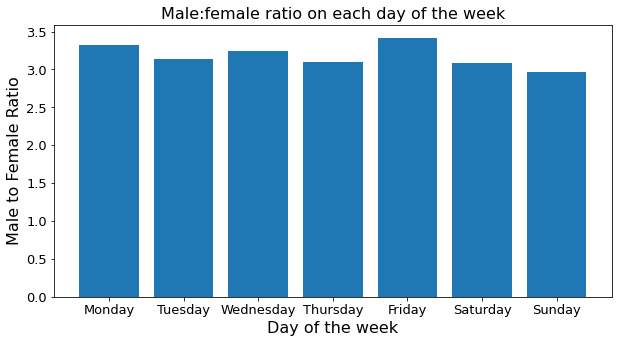

In [88]:
# Look at the ratio of the male:female ratio for all the days of the week.
startday_usertype = pd.DataFrame(df_new.groupby(['start_day', 'member_gender']).size())
startday_usertype = startday_usertype.rename(columns = {0 : "count"})
startday_usertype = startday_usertype.reset_index()
male_count = startday_usertype.loc[startday_usertype.member_gender=='Male']['count'].values
female_count = startday_usertype.loc[startday_usertype.member_gender=='Female']['count'].values
ratios = (male_count/female_count)
print(ratios)
plt.figure(figsize = (10,5));
plt.bar(DAYS_OF_WEEK, height = ratios);
plt.xticks(fontsize = 13); plt.yticks(fontsize = 13);
plt.xlabel("Day of the week", fontsize = 16); plt.ylabel("Male to Female Ratio", fontsize = 16);
plt.title("Male:female ratio on each day of the week", fontsize = 16);

In [89]:
# No notable differences here.

### Trip share ratio through the week

[0.10321525 0.09877431 0.10046087 0.10147059 0.09955057 0.16424301
 0.15422569]


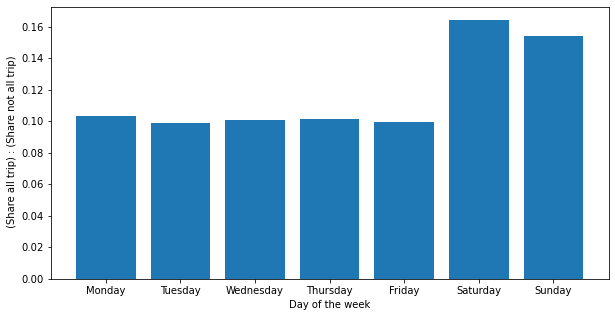

In [90]:
# What about the share all trip to share not all trip ratio?
startday_usertype = pd.DataFrame(df_new.groupby(['start_day', 'bike_share_for_all_trip']).size())
startday_usertype = startday_usertype.rename(columns = {0 : "count"}).reset_index()
all_trip_count = startday_usertype.loc[startday_usertype.bike_share_for_all_trip=='Yes']['count'].values
not_all_trip_count = startday_usertype.loc[startday_usertype.bike_share_for_all_trip=='No']['count'].values
ratios = (all_trip_count/not_all_trip_count)
print(ratios)
plt.figure(figsize = (10,5))
plt.bar(DAYS_OF_WEEK, height = ratios)
plt.ylabel(" (Share all trip) : (Share not all trip)")
plt.xlabel("Day of the week");

In [91]:
# An asymmetry between the weekdays and weekends!

### Gender differences

In [92]:
# Let's now look at gender differences

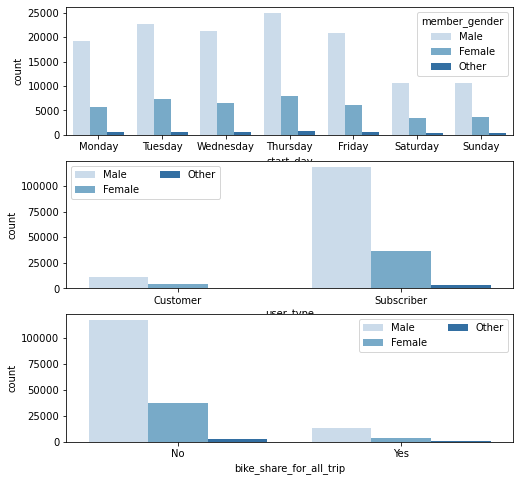

In [93]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: member_gender vs start_day
plt.subplot(3, 1, 1)
sb.countplot(data = df_new, x = 'start_day', hue = 'member_gender', palette = 'Blues')

# subplot 2: member_gender vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_new, x = 'user_type', hue = 'member_gender', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: member_gender vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_new, x = 'bike_share_for_all_trip', hue = 'member_gender', palette = 'Blues')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

In [94]:
# No interesting new gender disparities found.
# It is always true that there is a greater proportion of males than females (and more females than in the "other" category)
# regardless of whether we are looking at the day of the week, the user type 
# or whether the bike share was used for the whole trip.

### Age & ride duration

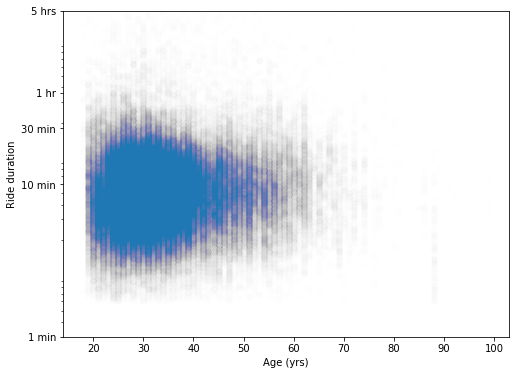

In [95]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'member_age', y = 'duration_sec', alpha = 0.002)
plt.ylim(60,18000)
plt.yscale('log')
plt.yticks([30, 600, 1800, 3600, 18000], ['1 min', '10 min', '30 min', '1 hr', '5 hrs'])
plt.xlabel('Age (yrs)')
plt.ylabel('Ride duration')
plt.show()

In [96]:
# One might have expected lower age groups to ride for longer.
# However, what the plot shows more clearly is that there is a greater range of times
# for younger ages compared to older ages.

# This can be seen more clearly if we plot the standard deviation of ride duration 
# against the age:

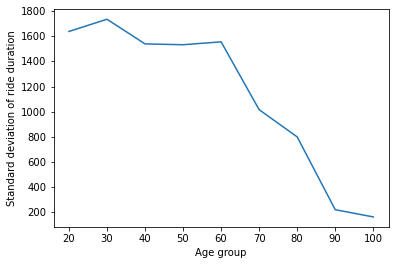

In [97]:
df['member_decade'] = round(df.member_age/10)*10
df.groupby('member_decade').std()['duration_sec'].plot();
plt.xlabel('Age group')
plt.ylabel('Standard deviation of ride duration');

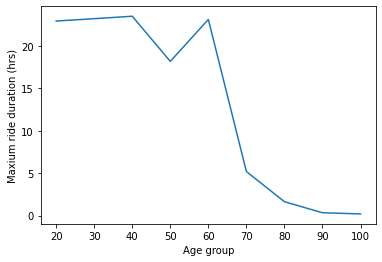

In [98]:
df['member_decade'] = round(df.member_age/10)*10
(df.groupby('member_decade').max()['duration_sec'] / 3600 ).plot();
plt.xlabel('Age group')
plt.ylabel('Maxium ride duration (hrs)');

In [99]:
# The plot above shows that all age groups below 60 years have 
# at least one rider that has taken a ride lasting most of a day 
# After that age, there is a sharp drop, with no rider taking a ride longer
# than 5 hours.

In [100]:
# Let's plot these differently to get a sense of the outliers.

[0 1 2 3 4 5 6 7 8]


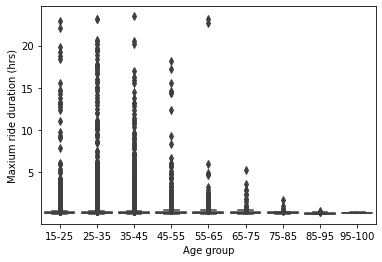

In [101]:
g = sb.boxplot(data = df, x='member_decade', y='duration_sec', color = default_color)
print(g.get_xticks())
plt.xlabel('Age group')
labels = np.array([5, 10, 15, 20])
positions = labels*3600
plt.yticks(positions,labels)
positions = np.array(g.get_xticks())
labels = ["15-25","25-35","35-45","45-55","55-65","65-75","75-85","85-95","95-100"]
plt.xticks(positions,labels)
plt.ylabel('Maxium ride duration (hrs)');

In [102]:
# The most interesting outliers are in the 55-65 age group. 
# Let's plot again and make this bigger.

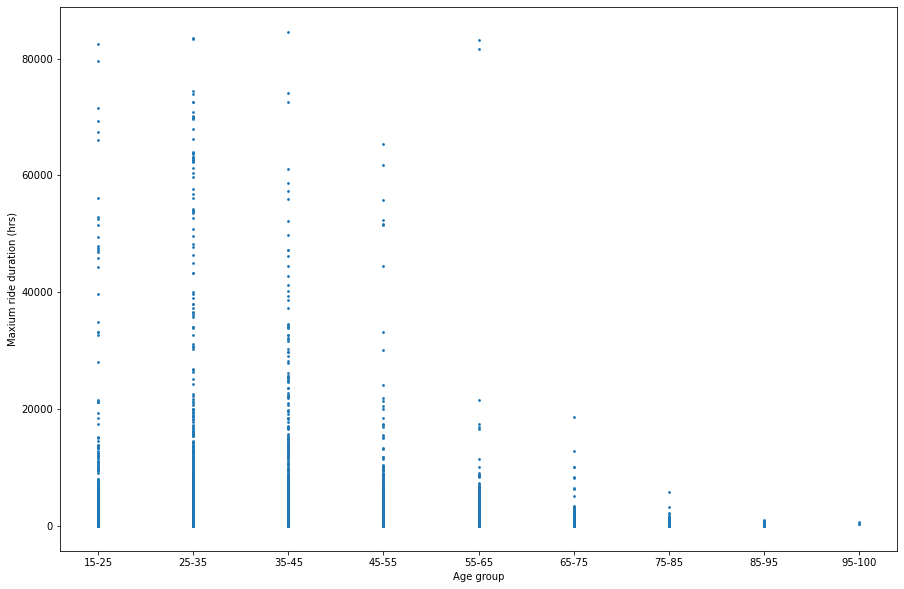

In [103]:
fig, ax = plt.subplots(figsize = (15,10))
plt.scatter(data = df, x='member_decade', y='duration_sec', s = 3)
positions = [20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]
labels = ["15-25","25-35","35-45","45-55","55-65","65-75","75-85","85-95","95-100"]
plt.xticks(positions,labels)
plt.xlabel('Age group')
plt.ylabel('Maxium ride duration (hrs)');

In [104]:
# We see clearly that the long duration trip made by the 60 age group is an outlier.
# Once that outlier is excluded, it is obvious that the maximum ride duration does decreases with age.

### Gender & ride duration

In [105]:
# Let's look at how ride duration and member gender are related.

Outlier Points Hidden


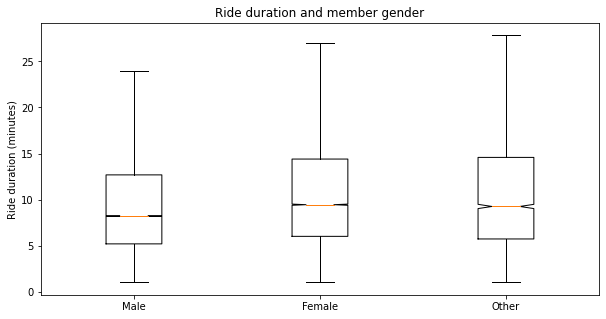

In [106]:
fig, ax = plt.subplots(figsize = (10,5))
data = [df[df.member_gender=='Male'].duration_sec /60, 
        df[df.member_gender=='Female'].duration_sec/60, 
        df[df.member_gender=='Other'].duration_sec/60]
ax.set_title('Ride duration and member gender')
print('Outlier Points Hidden')
ax.boxplot(data, notch ='True', showfliers=False)
plt.xticks([1,2,3],['Male', 'Female', 'Other'])
plt.ylabel('Ride duration (minutes)');
plt.show()
#plt.ylim(-1000,1000)#plt.yscale('log')

In [107]:
# For ride duration, there is a smaller interquartile range for males compared to the other gender groups.

### Day of the week & ride duration

In [108]:
# Let's look at how ride duration and day of the week are related.

Outlier Points Hidden


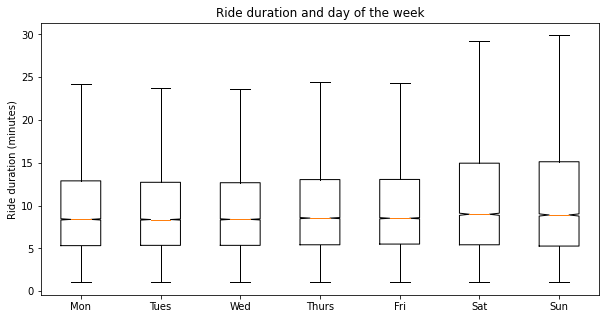

In [109]:
fig, ax = plt.subplots(figsize = (10,5))
data = [df[df.start_day=='Monday'].duration_sec /60, 
        df[df.start_day=='Tuesday'].duration_sec/60,
        df[df.start_day=='Wednesday'].duration_sec/60,
        df[df.start_day=='Thursday'].duration_sec/60,
        df[df.start_day=='Friday'].duration_sec/60,
        df[df.start_day=='Saturday'].duration_sec/60,
        df[df.start_day=='Sunday'].duration_sec/60
       ]
ax.set_title('Ride duration and day of the week')
print('Outlier Points Hidden')
ax.boxplot(data, notch ='True', showfliers=False)
plt.xticks([1,2,3,4,5,6,7],['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Ride duration (minutes)');
plt.show()
#plt.ylim(-1000,1000)#plt.yscale('log')

In [110]:
# There is a larger interquartile range for ride duration at the weekends.

### Age & gender

In [111]:
# Lastly, let us look at the relationship between member gender and member age

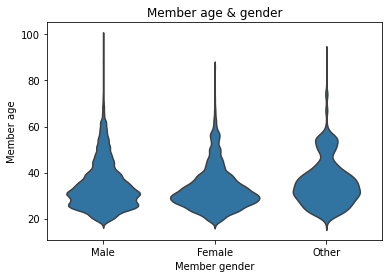

In [112]:
fig, ax = plt.subplots()
sb.violinplot(data = df, x = 'member_gender', y = 'member_age', color = default_color, inner = None);
plt.xlabel('Member gender')
plt.ylabel('Member age');
plt.title('Member age & gender');

In [113]:
# The maximum age is smallest in the Female gender group.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


There is a greater range of ride duration times for younger ages than older ages. 

The maximum ride duration decreases with age. All ages groups below 60 years have at least one rider that has taken a ride lasting most of the day. Above that age, no rider took a ride lasting longer than 5 hours.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?  

The stations are clustered around three locations in the San Fransciso area.

For each day, the subscribers are always more numerous than the customers but there is a 50% reduction in this ratio at the weekends. (Perhaps many subscribers *only* use bike sharing for commuting and therefore only during weekdays.)

The interesting gender disparities found were these: The maximum age is smaller in the female gender group.  For ride duration, there is a smaller interquartile range for males compared to the other gender groups.

## Multivariate Exploration

In [114]:
categoric_vars

['member_gender', 'start_day', 'user_type', 'bike_share_for_all_trip']

In [115]:
df[df['member_gender'] == 'Other'].shape[0]

3646

In [116]:
# Let us go systematically through the interesting triplewise relationships, i.e. the relationships between three variables.

### Start day, age & gender

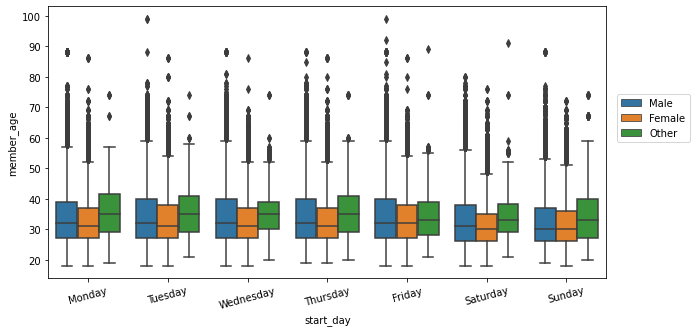

In [117]:
fig, ax1 = plt.subplots(figsize = (10,5))
sb.boxplot(data = df, x = 'start_day', y = 'member_age', hue = 'member_gender', ax = ax1)
plt.legend(loc = (1.02,0.5))
plt.xticks(rotation = 15);

In [118]:
# This is difficult to interpret. Let us plot it slightly differently...

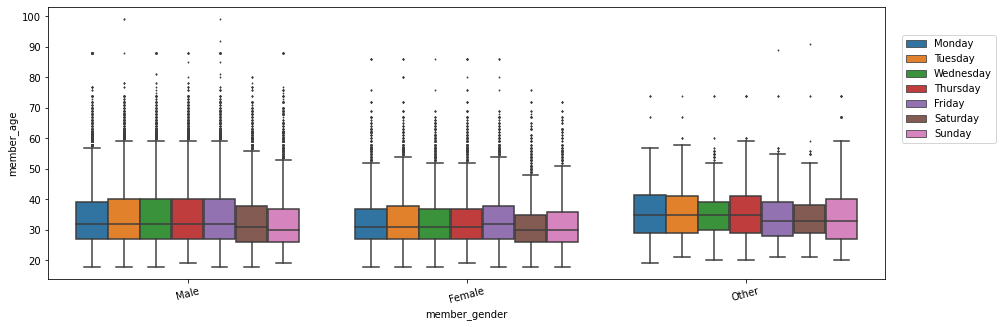

In [119]:
fig, ax1 = plt.subplots(figsize = (15,5))
sb.boxplot(data = df, hue = 'start_day', y = 'member_age', x = 'member_gender', fliersize = 1, ax = ax1)
plt.legend(loc = (1.02,0.5))
plt.xticks(rotation = 15);

In [120]:
# Now we see a weekend difference. This would be easier to see if the weekdays were in blue and the weekends in red...

In [121]:
def rgb(r,g,b): 
    '''Normalises the rgb values so that they can be used by seaborn'''
    return ( (r/255), (g/255), (b/255)  )
# A palette with weekdays in blue and weekends in red...
my_pal = {"Saturday": rgb(255,0,0), "Sunday": rgb(220,20,60), 
          "Monday": rgb(65,105,225), "Thursday": rgb(30,144,255), 
          "Friday": rgb(100,149,237), "Wednesday": rgb(106,90,205), "Tuesday": rgb(123,104,238)}

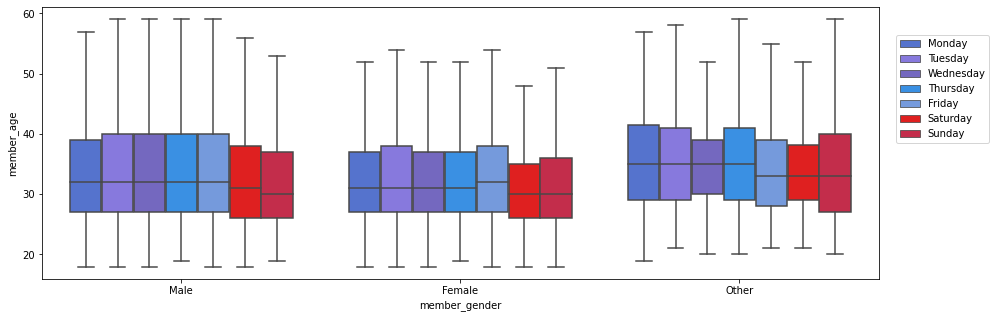

In [122]:
# Also get rid of outliers...
fig, ax1 = plt.subplots(figsize = (15,5))
sb.boxplot(data = df, hue = 'start_day', y = 'member_age', x = 'member_gender', showfliers=False, ax = ax1, palette = my_pal)
plt.legend(loc = (1.02,0.5))
plt.show()

In [123]:
# For males and females at weekends (compared to weekdays):
# The median age is slightly lower
# Both the 25th and the 75th quartile are also at lower ages.

In [124]:
# For the next plots to look correct, we need to get rid of some outliers.

In [125]:
print(100*len(df[df.duration_sec>3600])/len(df)) # Less than 1% are above one hour, so let's remove...
print(100*len(df[df.member_age>60])/len(df)) # Less than 1% are above 60, so let's remove...
df_no_outliers = df[df.duration_sec<3600]
df_no_outliers = df_no_outliers[df_no_outliers.member_age<60]

0.7925389264699996
1.9773445943241403


### Ride duration, age & start day

In [126]:
# If we plot the same things on a violin plot do we see anything new?

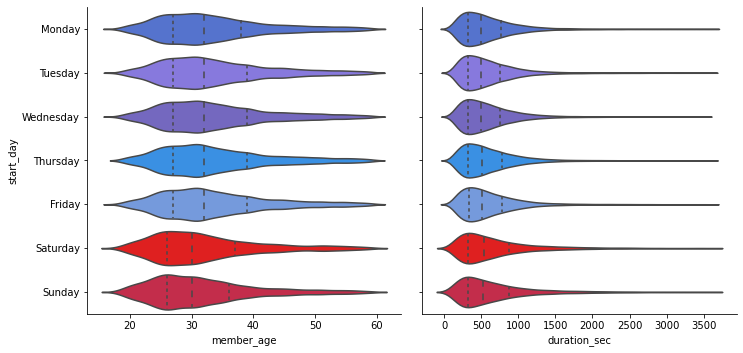

In [127]:
g = sb.PairGrid(data = df_no_outliers, x_vars = ['member_age', 'duration_sec'], y_vars = ['start_day'], height = 5);
g.map(sb.violinplot, inner = 'quartile', palette= my_pal);

In [128]:
# It is even more obvious here that:
# At weekends (compared to weekdays),
# the median age is slightly lower and
# both the 25th and the 75th quartile are also at lower ages.

In [ ]:
# At the weekends, (compared to weekdays):
# The 75th quartile for ride duration time is slightly higher.

In [129]:
# Are there any other differences between the weekdays and the weekends?

### Other weekend differences

In [130]:
fontsize = 12
df_extra = df.copy()
df_extra['start_hour'] = pd.Series([start.time().hour for start in df_extra.start_time])
df_extra.rename(columns = {'start_station_id': 'Start station ID',
                      'bike_id': 'Bike ID',
                      'start_day': 'Day of the week',
                      'start_hour': 'Starting hour for bike ride'},
                      inplace = True)

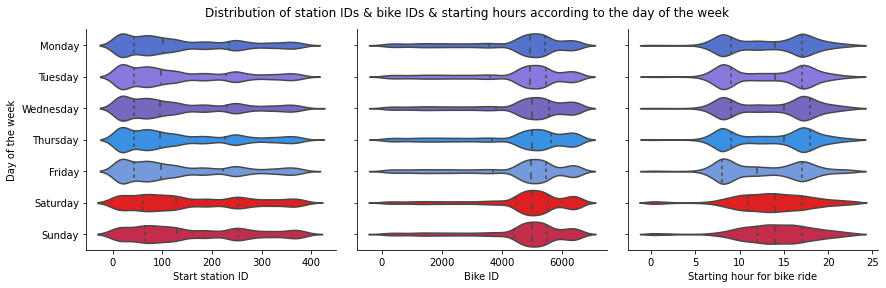

In [131]:
g = sb.PairGrid(data = df_extra, x_vars = ['Start station ID', 'Bike ID', 'Starting hour for bike ride'], y_vars = ['Day of the week'], height = 4);
g.map(sb.violinplot, inner = 'quartile', palette= my_pal, fontsize = fontsize);
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Distribution of station IDs & bike IDs & starting hours according to the day of the week');
plt.show()

In [132]:
# At weekends, there is a different distribution for the most used stations and the most used bikes.
# The bimodal distribution of start times disappears at the weekend.

In [133]:
# We have been interested in how the ride duration varies with the other variables.
# Let us look at how it varies with both age and gender

### Ride duration, age & gender

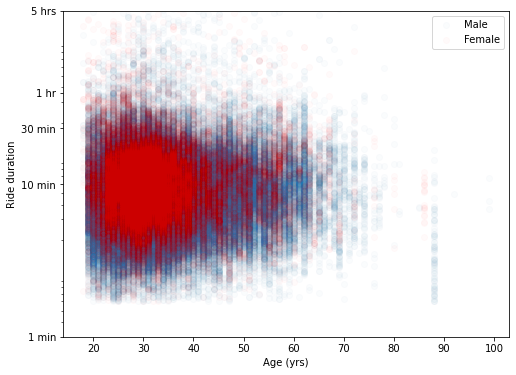

In [134]:
df_male = df[df.member_gender == 'Male'].reset_index()
df_female = df[df.member_gender == 'Female'].reset_index()
plt.figure(figsize = [8, 6])
plt.scatter(data = df_male, x = 'member_age', y = 'duration_sec', alpha = 0.02, label = 'Male')
plt.scatter(data = df_female, x = 'member_age', y = 'duration_sec', alpha = 0.02, color = 'red', label = 'Female')
plt.ylim(60,18000)
plt.yscale('log')
plt.yticks([30, 600, 1800, 3600, 18000], ['1 min', '10 min', '30 min', '1 hr', '5 hrs'])
plt.xlabel('Age (yrs)')
plt.ylabel('Ride duration')
plt.legend()
plt.show()

In [135]:
# Not seeing anything here but it's confusing because there are substantially more
# males than females.

# Let's do this differently by sampling the same number of males and females.

In [136]:
df_male = df[df.member_gender == 'Male'].reset_index()
df_other = df[df.member_gender == 'Other'].reset_index()
samples = np.random.choice(df_male.shape[0], 3000, replace = False)
df_male_samp = df_male.loc[samples,:]
samples = np.random.choice(df_female.shape[0], 3000, replace = False)
df_female_samp = df_female.loc[samples,:]
samples = np.random.choice(df_other.shape[0], 3000, replace = False)
df_other_samp = df_female.loc[samples,:]

In [137]:
len(df[df.member_gender == 'Other'].reset_index())

3646

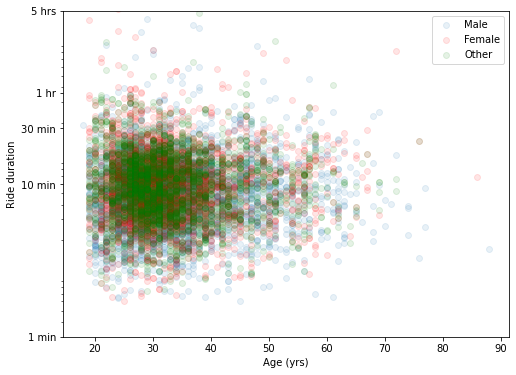

In [138]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df_male_samp, x = 'member_age', y = 'duration_sec', alpha = 0.1, label = 'Male')
plt.scatter(data = df_female_samp, x = 'member_age', y = 'duration_sec', alpha = 0.1, color = 'red', label = 'Female')
plt.scatter(data = df_other_samp, x = 'member_age', y = 'duration_sec', alpha = 0.1, color = 'green', label = 'Other')
plt.ylim(60,18000)
plt.yscale('log')
plt.yticks([30, 600, 1800, 3600, 18000], ['1 min', '10 min', '30 min', '1 hr', '5 hrs'])
plt.xlabel('Age (yrs)')
plt.ylabel('Ride duration')
plt.legend()
plt.show()

In [139]:
# Still not seeing any substantial differences between males, females, or those in the "other" group.

In [140]:
# Let look at differences between weekends and weekdays
# Again, we will sample the same number from each.

In [141]:
weekend = ['Saturday', 'Sunday']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekend = df[df.start_day.isin(weekend)].reset_index() 
df_weekdays = df[df.start_day.isin(weekdays)].reset_index() 

samples = np.random.choice(df_weekdays.shape[0], 3000, replace = False)
df_weekdays_samp = df_weekdays.loc[samples,:]
samples = np.random.choice(df_weekend.shape[0], 3000, replace = False)
df_weekend_samp = df_weekend.loc[samples,:]

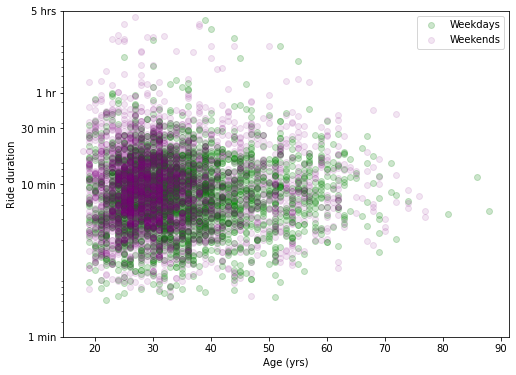

In [142]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df_weekdays_samp, x = 'member_age', y = 'duration_sec', alpha = 0.2, color = 'green', label = 'Weekdays')
plt.scatter(data = df_weekend_samp, x = 'member_age', y = 'duration_sec', alpha = 0.1, color = 'purple', label = 'Weekends')
plt.ylim(60,18000)
plt.yscale('log')
plt.yticks([30, 600, 1800, 3600, 18000], ['1 min', '10 min', '30 min', '1 hr', '5 hrs'])
plt.xlabel('Age (yrs)')
plt.ylabel('Ride duration')
plt.legend()
plt.show()

In [143]:
# The range of ride durations is smaller for older riders (regardless of whether it is a weekend or weekday).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For males and females at weekends (compared to weekdays), the median age is slightly lower and both the 25th and the 75th quartile are also at lower ages.

At weekends, there is a different distribution for the stations most used and the bikes most used.
The 75th quartile for ride duration time is slightly higher at the weekends.
The bimodal distribution of start times disappears at the weekend.

### Were there any interesting or surprising interactions between features?

I did not expect the range of ride duration times to be higher at the weekends, but that appears to be so.
Also although this range is higher (at the weekends), the range is smaller for older riders.

Please note, for the benefit of future students, that the instructions provided for creating a slideshow no longer work.
The following should be used instead:
```
jupyter nbconvert slidedeck.ipynb --to slides --no-prompt --TemplateExporter.exclude_input=True --ServePostProcessor.port=8001 --post serve
```

## Appendix

I also plotted some of the above relationships differently at first. These plots were not so useful, so they have been moved here to the appendix.

### Ride duration, age & gender

In [144]:
# Let us look at how ride duration varies with age & gender:

In [145]:
# First we need an array where the genders are equally represented
df_male = df[df.member_gender=='Male'].reset_index()
samples = np.random.choice(df_male.shape[0], 3000, replace = False)
df_male_samp = df_male.loc[samples,:]
df_female = df[df.member_gender=='Female'].reset_index()
samples = np.random.choice(df_female.shape[0], 3000, replace = False)
df_female_samp = df_female.loc[samples,:]
df_other = df[df.member_gender=='Other'].reset_index()
samples = np.random.choice(df_other.shape[0], 3000, replace = False)
df_other_samp = df_other.loc[samples,:]
pdList  = [df_male_samp, df_female_samp, df_other_samp]  # List of your dataframes
df_samp0 = pd.concat(pdList)
df_samp0.reset_index(inplace = True)

C:\Users\renju\Anaconda3\envs\udacity\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


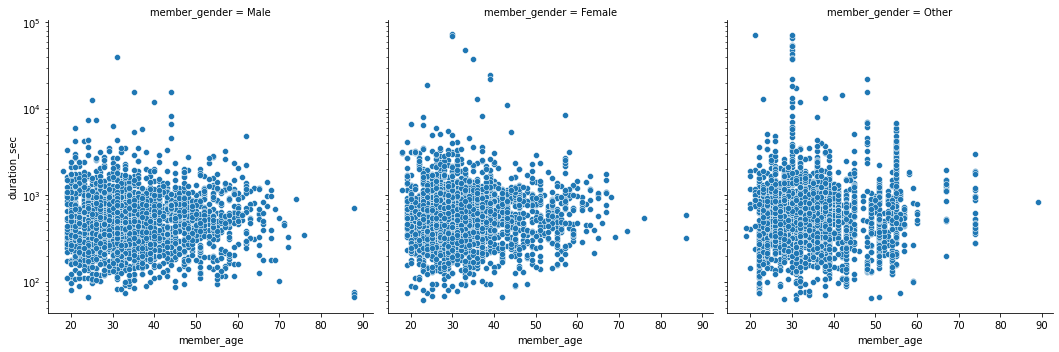

In [146]:
#samples = np.random.choice(df_samp0.shape[0], 1000, replace = False)
#df_samp = df_samp0.loc[samples,:]
g = sb.FacetGrid(data = df_samp0, col = 'member_gender', size = 5) #, col_wrap = 3)
g.map(sb.scatterplot, 'member_age', 'duration_sec');
plt.yscale('log');

In [147]:
# Male & female distributions look similar. 
# For the "Other" category, there is a greater range in duration time for the 31 age group.

### Ride duration, age & ride start day

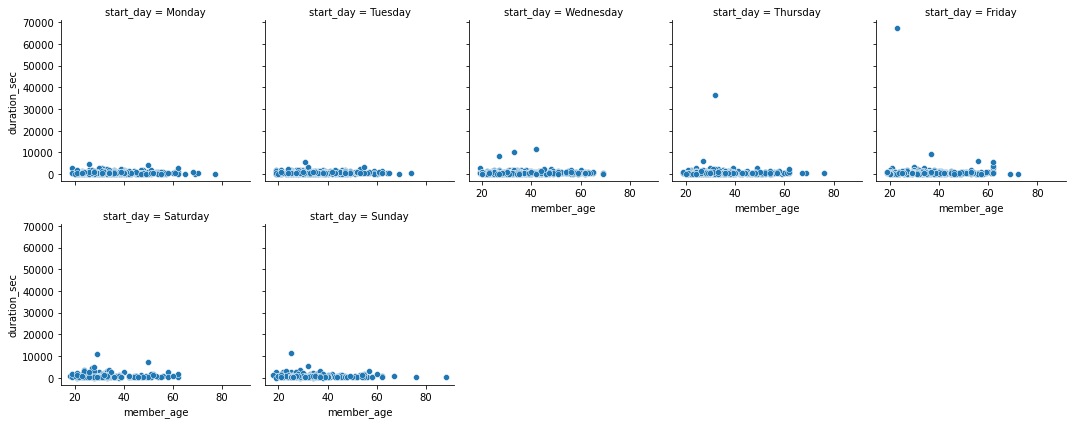

In [148]:
samples = np.random.choice(df.shape[0], 3000, replace = False)
df_samp = df.loc[samples,:]
g = sb.FacetGrid(data = df_samp, col = 'start_day', col_wrap = 5)
g.map(sb.scatterplot, 'member_age', 'duration_sec');

In [149]:
# Not much to learn here.